# Лаборатоная работа № 3

#### Импортирование библиотек:

In [2]:
import os
import warnings
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN, estimate_bandwidth
warnings.filterwarnings('ignore')

#### Чтение данных из файла:

In [5]:
data = np.loadtxt('/Users/daria/my_git/YAPP_python_2_course/lab_3/tests/example.txt')

#### Проверка файла на валидность:

In [31]:
def check_file(file_path):
    if not file_path.endswith('.txt'):
        print('\nThe file has a different extension (not ".txt")!')
        return False
    elif os.path.getsize(file_path) == 0:
        print('\nThere is no data in the file; it is empty!')
        return False
    elif not os.path.exists(file_path):
        print('\nThe file does not exist!')
        return False
    return True

### Построение графика № 1:

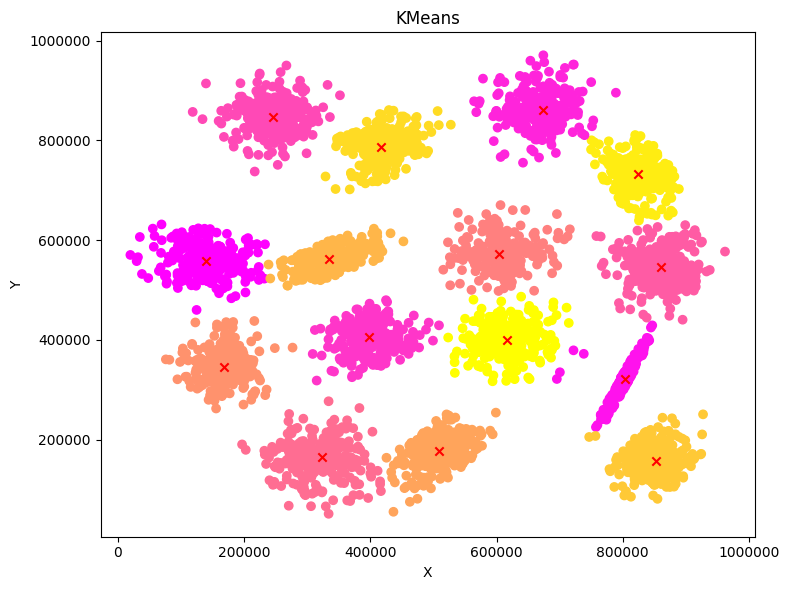

In [21]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(data)
kmeans_labels = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='spring')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.ticklabel_format(style='plain')
plt.title('KMeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Метод KMeans разделяет данные на 15 кластеров. Он хорошо работает с данными, где кластеры имеют сферическую форму и одинаковую дисперсию. Однако, для данных с различными размерами и формами кластеров, KMeans может давать неоптимальные результаты.

Преимущества: 
- простота реализации, масштабируемость, хорошая производительность на больших наборах данных
- время выполнения исходного кода составило ~0.5 сек, что является очень быстрым исполнением программы для меня, как пользователя

Недостатки: 
- требуется заранее указывать количество кластеров, чувствителен к выбросам и начальным значениям центроидов

### Построение графика № 2:

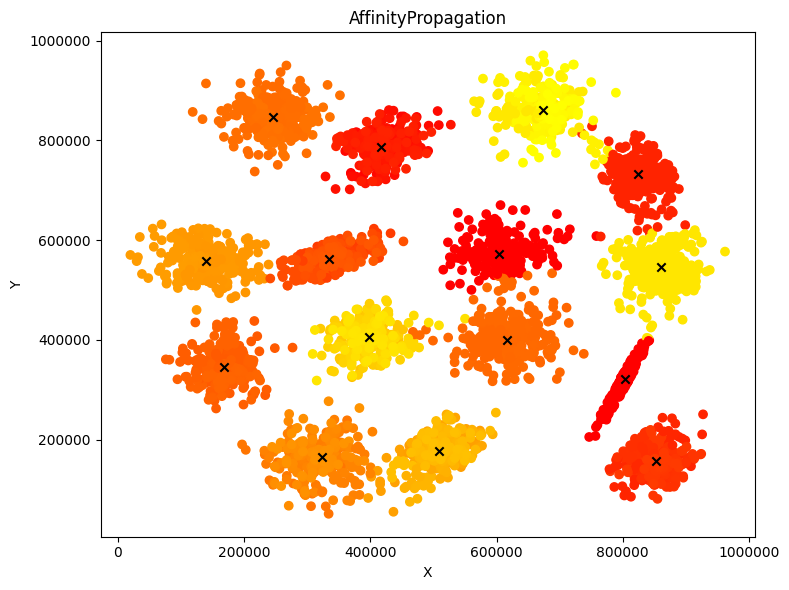

In [22]:
affinity_propagation = AffinityPropagation()
affinity_propagation.fit(data)
affinity_propagation_labels = affinity_propagation.labels_
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=affinity_propagation_labels, cmap='autumn')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black')
plt.ticklabel_format(style='plain')
plt.title('AffinityPropagation')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Метод AffinityPropagation позволяет обнаруживать не только кластеры, но и выбирать представителей каждого кластера. Он хорошо работает с данными, где кластеры имеют различные размеры и формы, но может быть вычислительно сложным для больших наборов данных.

Преимущества: 
- не требует указания количества кластеров, способен находить скрытые структуры в данных

Недостатки: 
- высокая вычислительная сложность, может давать неустойчивые результаты
- время выполнения исходного кода составило ~36.1 сек, что является очень медленным исполнением программы для меня, как пользователя

### Построение графика № 3:

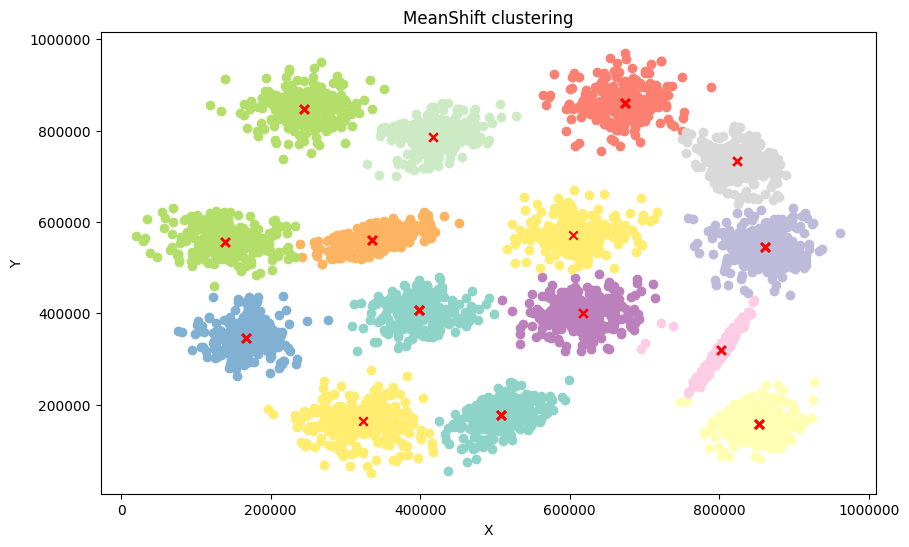

In [12]:
bandwidth = estimate_bandwidth(data, quantile=0.05)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(data)
cluster_labels = mean_shift.labels_
centroids = mean_shift.cluster_centers_
unique_labels = np.unique(cluster_labels)
colors = plt.get_cmap('Set3', 15)
plt.figure(figsize=(10, 6))
for label in unique_labels:
    cluster_data = data[cluster_labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors(label)])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.title('MeanShift clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.ticklabel_format(style='plain')
plt.show()

Метод MeanShift также обнаруживает кластеры и их центры. Он хорошо работает с данными, где кластеры имеют различные размеры и формы, но может быть вычислительно сложным для больших наборов данных.

Преимущества: 
- не требует указания количества кластеров, автоматически определяет количество и положение кластеров

Недостатки: 
- высокая вычислительная сложность, не подходит для больших наборов данных
- время выполнения исходного кода составило ~22.9 сек, что является очень медленным исполнением программы для меня, как пользователя

### Построение графика № 4:

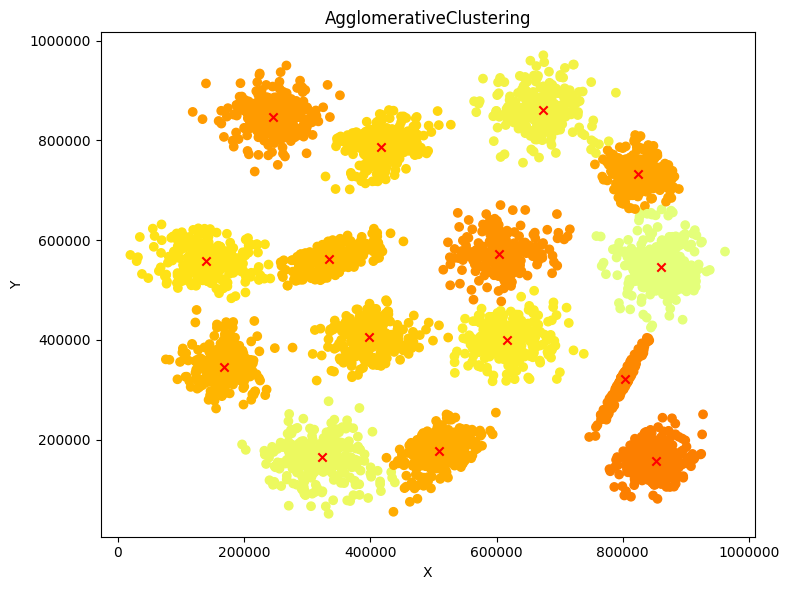

In [8]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=15)
agglomerative_clustering.fit(data)
agglomerative_clustering_labels = agglomerative_clustering.labels_
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=agglomerative_clustering_labels, cmap='Wistia')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.ticklabel_format(style='plain')
plt.title('AgglomerativeClustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Метод AgglomerativeClustering использует иерархическую кластеризацию, которая объединяет близкие точки в кластеры. Он хорошо работает с данными, где кластеры имеют различные размеры и формы, но может быть вычислительно сложным для больших наборов данных.

Преимущества: 
- не требует указания количества кластеров, позволяет строить иерархическую структуру кластеров
- время выполнения исходного кода составило ~0.4 сек, что является очень быстрым исполнением программы для меня, как пользователя

Недостатки: 
- требуется выбрать подходящую метрику расстояния, может быть вычислительно затратным на больших наборах данных

### Построение графика № 5:

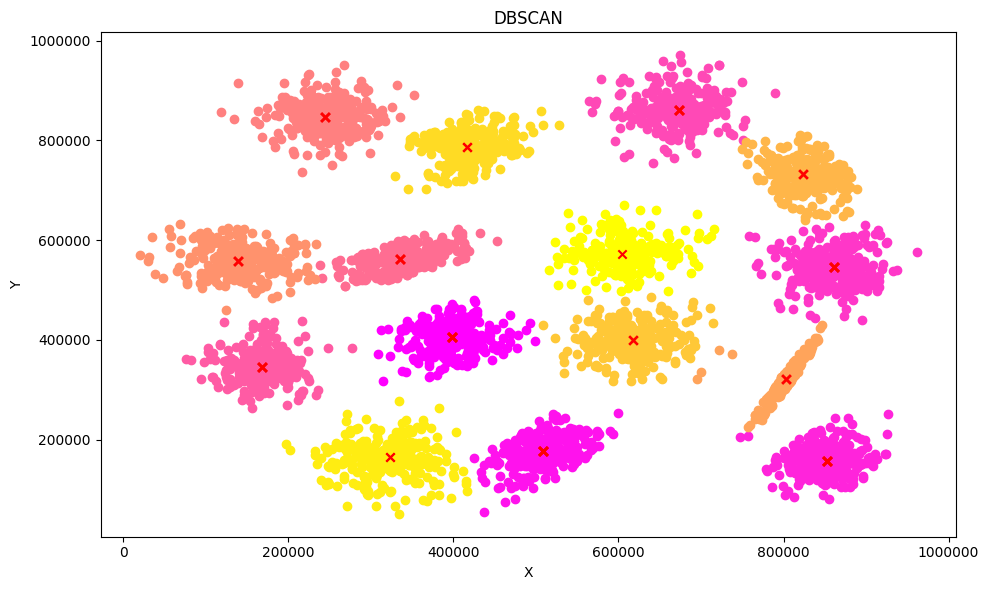

In [20]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(data)
dbscan_labels = dbscan.labels_
unique_labels = np.unique(cluster_labels)
colors = plt.get_cmap('spring', 15)
plt.figure(figsize=(10, 6))
for label in unique_labels:
    cluster_data = data[cluster_labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors(label)])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.ticklabel_format(style='plain')
plt.title('DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Метод DBSCAN обнаруживает плотные области в данных и разделяет их на кластеры. Он хорошо работает с данными, где кластеры имеют различные размеры и формы, и может обнаруживать выбросы. Однако, для данных с различными плотностями кластеров, DBSCAN может давать неоптимальные результаты.

Преимущества: 
- не требует указания количества кластеров, способен обнаруживать кластеры любой формы
- время выполнения исходного кода составило ~0.1 сек, что является очень быстрым исполнением программы для меня, как пользователя

Недостатки: 
- чувствителен к выбору параметров, может давать неустойчивые результаты на данных с различной плотностью

### Общий вывод:

Выводы о применимости методов к различным видам кластерных данных зависят от характеристик данных и требований задачи. 
1) Если данные имеют различные размеры и формы кластеров, методы AffinityPropagation, MeanShift и DBSCAN могут быть более подходящими. 
2) Если данные имеют одинаковые размеры и формы кластеров, метод KMeans может быть хорошим выбором.